<a href="https://colab.research.google.com/github/HST0077/Financial-Engineering-Python/blob/main/InterestRate_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **자연 상수 e**

In [1]:
from sympy import limit, symbols, oo

n=symbols('n',positive=True,integer=True)
limit((1+1/n)**(n),n,oo)

E

In [2]:
limit((1+n)**(1/n),n,0)

E

In [3]:
from sympy import exp

exp(1)

E

# **자연 로그**

In [4]:
from sympy import log, exp

log(exp(1))

1

In [5]:
# 로그함수의 미분
from sympy import diff

x=symbols('x', positive=True)

diff(log(x),x) #1차 도함수

1/x

In [6]:
diff(log(x),x,2) #2차 도함수

-1/x**2

# **단리법, 복리법**

In [9]:
# 단리법
N,r,T=100,0.05,1
n_list=[2,4,12,52,365]

for n in n_list:
    out=N*(1+r/n*n*T) # 단리법
    print('년 {0}회 단리법으로 계산한 {1}년후 금액:{2}'.format(n,T,out))

년 2회 단리법으로 계산한 1년후 금액:105.0
년 4회 단리법으로 계산한 1년후 금액:105.0
년 12회 단리법으로 계산한 1년후 금액:105.0
년 52회 단리법으로 계산한 1년후 금액:105.0
년 365회 단리법으로 계산한 1년후 금액:105.0


In [8]:
# 복리법
import numpy as np
n_list=[2,4,12,52,365]

for n in n_list:
    out=N*(1+r/n)**(n*T) # 복리법
    print('년 {0}회 복리법으로 계산한 {1}년후 금액:{2}'.format(n,T,out))

년 2회 복리법으로 계산한 1년후 금액:105.06249999999999
년 4회 복리법으로 계산한 1년후 금액:105.09453369140623
년 12회 복리법으로 계산한 1년후 금액:105.1161897881733
년 52회 복리법으로 계산한 1년후 금액:105.12458419272002
년 365회 복리법으로 계산한 1년후 금액:105.12674964674473


In [10]:
# 연속 복리
from sympy import oo, limit, symbols
n=symbols('n',positive=True,integer=True)
limit(N*(1+r/n)**(n*T),n,oo)

100*exp(1/20)

In [11]:
# 앞 셀의 결과를 숫자로 표현
_.evalf()

105.127109637602

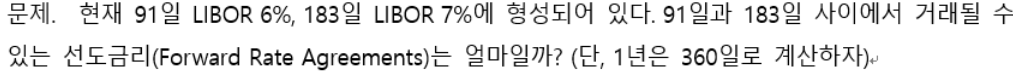

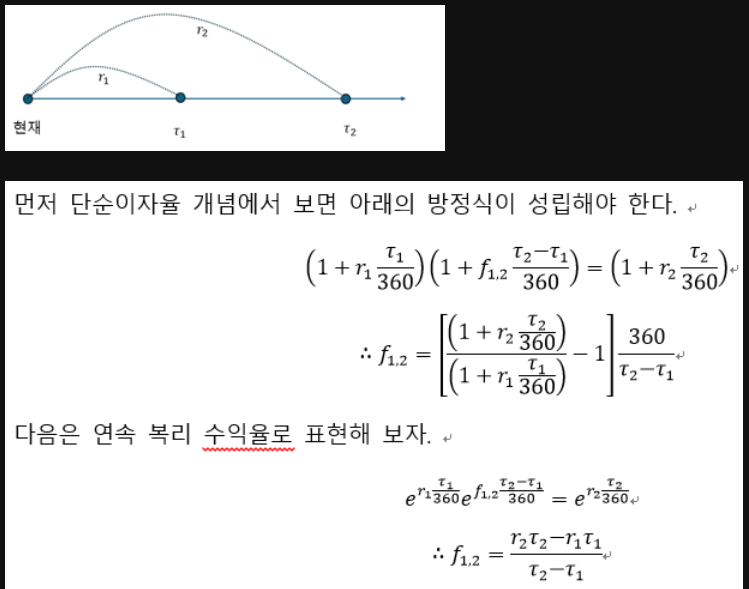

In [12]:
# 단순 수익율 개념에 의한 FRA
r1,r2=0.06,0.07
t1,t2=91,183
basis=360

FRA12=((1+r2*t2/basis)/(1+r1*t1/basis)-1)*(basis/(t2-t1))
FRA12

0.07869772222737678

In [13]:
# 연속복리 수익율 개념에 의한 FRA
FRA12=(r2*t2-r1*t1)/(t2-t1)
FRA12

0.0798913043478261

# **일반 채권 분석**

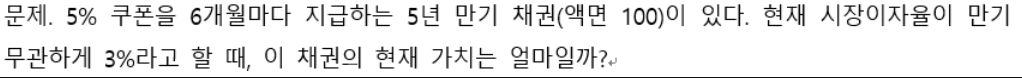

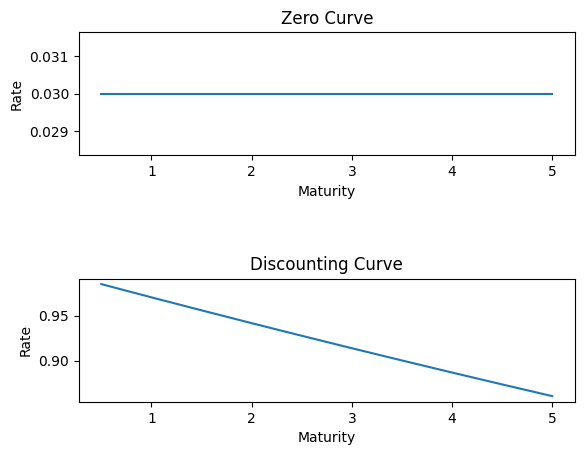

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0.5부터 5까지 0.5씩 증가하는 시간 설정(in years)
T=np.arange(0.5,5.1,0.5)

# 이자율 커브
rate=0.03 # 연이자율
Disc=np.exp(-rate*T) # 할인율 커브
# zero curve 생성
Zero_curve=[]
for t in T:
    # 연속복리기준 spot rate
    r_t=(rate*t)/t
    Zero_curve.append(r_t)

# zero curve 생성
plt.subplot(2,1,1)
plt.plot(T,Zero_curve)
plt.xlabel('Maturity')
plt.ylabel('Rate')
plt.title('Zero Curve')

# 할인율 커브 생성
plt.subplot(2,1,2)
plt.plot(T,Disc)
plt.xlabel('Maturity')
plt.ylabel('Rate')
plt.title('Discounting Curve')

# subplot 간 간격 조절
plt.subplots_adjust(hspace=1)

In [15]:
Face_value=100 # 채권 명목 금액 설정

# Cash Flow 생성
coupons=5 # 연환산 쿠폰
freq=2 # 연 쿠폰 지급횟수
CF=np.array([coupons/freq]*10) # 10개의 쿠폰
CF[-1]+=Face_value # 마지막에 명목금액 더해줌

# 채권가격
Disc_CF=CF*Disc #Discounted Cash Flow
# 데이터프레임으로 보기
df=pd.DataFrame(data={'Time':T,'CashFlow':CF,'Disc_CF':Disc_CF})
Bond_price=np.sum(CF*Disc)
print(df)
print('채권가격:',Bond_price)

   Time  CashFlow    Disc_CF
0   0.5       2.5   2.462780
1   1.0       2.5   2.426114
2   1.5       2.5   2.389994
3   2.0       2.5   2.354411
4   2.5       2.5   2.319359
5   3.0       2.5   2.284828
6   3.5       2.5   2.250811
7   4.0       2.5   2.217301
8   4.5       2.5   2.184290
9   5.0     102.5  88.222568
채권가격: 109.11245516146882


In [16]:
# Bond price 함수 만들기
def bnd_pricer(rate,coupon,freq,maturity,face_value,*args):
    # freq: 연 쿠폰 지급회수
    period=1/freq
    T=np.arange(period,maturity+0.1,period)
    Disc=np.exp(-rate*T) # 할인율 커브

    CF=np.array([coupons/freq]*len(T))
    CF[-1]+=Face_value # 마지막에 명목금액 더해줌

    # 채권가격
    Disc_CF=CF*Disc #Discounted Cash Flow
    # 데이터프레임으로 보기
    df=pd.DataFrame(data={'Time':T,'CashFlow':CF,'DF':Disc,'Disc_CF':Disc_CF})
    Bond_price=np.sum(CF*Disc)

    if args:
        if 'df' in args:
            return Bond_price, df
    return Bond_price

In [17]:
bnd_pricer(0.03,5,2,5,100)

109.11245516146882

In [18]:
P1,df1=bnd_pricer(0.03,5,2,5,10,'df')

In [19]:
print(df1)

   Time  CashFlow        DF    Disc_CF
0   0.5       2.5  0.985112   2.462780
1   1.0       2.5  0.970446   2.426114
2   1.5       2.5  0.955997   2.389994
3   2.0       2.5  0.941765   2.354411
4   2.5       2.5  0.927743   2.319359
5   3.0       2.5  0.913931   2.284828
6   3.5       2.5  0.900325   2.250811
7   4.0       2.5  0.886920   2.217301
8   4.5       2.5  0.873716   2.184290
9   5.0     102.5  0.860708  88.222568


In [20]:
# 10 bp 상승시 채권가격
print('10 bp 상승시 채권가격:', bnd_pricer(0.031,5,2,5,100))
print('채권가격 변화:', bnd_pricer(0.031,5,2,5,100)-bnd_pricer(0.03,5,2,5,100))

10 bp 상승시 채권가격: 108.62134271903469
채권가격 변화: -0.49111244243412955


In [21]:
# 듀레이션 구하기

df1['t*DCF']=df1.Time*df.Disc_CF
print(df1)
# 열 합 구하기
col_sum=df1.sum(axis=0)
print(col_sum)
D=(1/df1.DF.iloc[0])*col_sum.iloc[-1]/col_sum.iloc[-2]
Dm=col_sum.iloc[-1]/col_sum.iloc[-2]
print('맥컬리 듀레이션:',D)
print('수정 듀레이션:',Dm)

   Time  CashFlow        DF    Disc_CF       t*DCF
0   0.5       2.5  0.985112   2.462780    1.231390
1   1.0       2.5  0.970446   2.426114    2.426114
2   1.5       2.5  0.955997   2.389994    3.584991
3   2.0       2.5  0.941765   2.354411    4.708823
4   2.5       2.5  0.927743   2.319359    5.798397
5   3.0       2.5  0.913931   2.284828    6.854484
6   3.5       2.5  0.900325   2.250811    7.877840
7   4.0       2.5  0.886920   2.217301    8.869204
8   4.5       2.5  0.873716   2.184290    9.829304
9   5.0     102.5  0.860708  88.222568  441.112838
Time         27.500000
CashFlow    125.000000
DF            9.216663
Disc_CF     109.112455
t*DCF       492.293384
dtype: float64
맥컬리 듀레이션: 4.579985341746664
수정 듀레이션: 4.511798243361652


In [22]:
# 수정 듀레이션으로 채권가격 예측
P2=P1*(1-Dm*10/10000)
print('10 bp 상승시 채권가격(듀레이션이용):', P2)
print('채권가격 변화:', P2-P1)
print('10 bp 상승시 채권가격(채권가격함수이용):', bnd_pricer(0.031,5,2,5,100))

10 bp 상승시 채권가격(듀레이션이용): 108.62016177794243
채권가격 변화: -0.49229338352638763
10 bp 상승시 채권가격(채권가격함수이용): 108.62134271903469


In [23]:
# 듀레이션 구하는 함수 작성
def bnd_duration(rate,coupon,freq,maturity,face_value,*args):
    P1,df1=bnd_pricer(rate,coupon,freq,maturity,face_value,'df')
    df1['t*DCF']=df1.Time*df.Disc_CF
    # 열 합 구하기
    col_sum=df1.sum(axis=0)
    D=(1/df1.DF.iloc[0])*col_sum.iloc[-1]/col_sum.iloc[-2]
    Dm=col_sum.iloc[-1]/col_sum.iloc[-2]
    if args:
        if 'Both' in args:
            return D, Dm
    return Dm

bnd_duration(0.03,5,2,5,100)

4.511798243361652

In [24]:
# 500 bp 변화에 대한 채권가격
r_delta=500
P1=bnd_pricer(0.03,5,2,5,100)
Dm=bnd_duration(0.03,5,2,5,100)
P2=P1*(1-Dm*r_delta/10000)
print('Duration 이용 채권가격 예측:', P2)
print('채권함수를 이용한 채권가격:',bnd_pricer(0.03+r_delta/10000,5,2,5,100))

Duration 이용 채권가격 예측: 84.4977859851492
채권함수를 이용한 채권가격: 87.22764904357132


Text(0, 0.5, 'Bond Price')

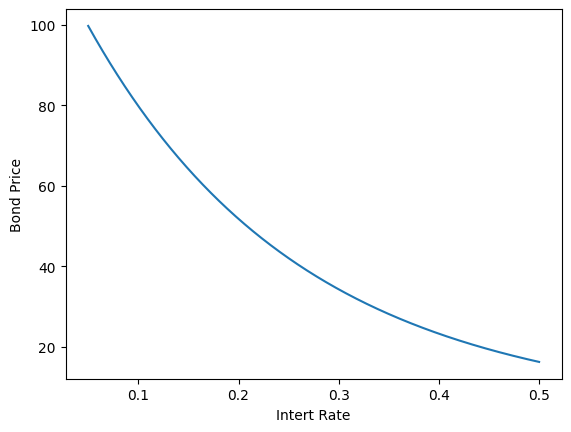

In [25]:
# 금리 변화에 따르는 채권 그래프 그리기
# 시장 금리를 5%부터 50%까지의 변화시킴
rates=np.linspace(0.05,0.50,1000) # 1000개의 point 생성
bonds=[]
for rate in rates:
    bonds.append(bnd_pricer(rate,5,2,5,100))
plt.plot(rates,bonds)
plt.xlabel('Intert Rate')
plt.ylabel('Bond Price')

In [26]:
# 컨벡시티 구하기
P1,df1=bnd_pricer(0.03,5,2,5,10,'df')
df1['t*DCF']=df1.Time*df.Disc_CF
df1['t(t+1)*DCF']=(df1.Time+1/freq)*df1['t*DCF']
print(df1)
# 열 합 구하기
col_sum=df1.sum(axis=0)
print(col_sum)
p0=col_sum[-3]
mul_factor=p0*(1+0.03/freq)**2
C=col_sum[-1]/mul_factor

print('컨벡시티:',C)

   Time  CashFlow        DF    Disc_CF       t*DCF   t(t+1)*DCF
0   0.5       2.5  0.985112   2.462780    1.231390     1.231390
1   1.0       2.5  0.970446   2.426114    2.426114     3.639171
2   1.5       2.5  0.955997   2.389994    3.584991     7.169981
3   2.0       2.5  0.941765   2.354411    4.708823    11.772057
4   2.5       2.5  0.927743   2.319359    5.798397    17.395190
5   3.0       2.5  0.913931   2.284828    6.854484    23.990694
6   3.5       2.5  0.900325   2.250811    7.877840    31.511358
7   4.0       2.5  0.886920   2.217301    8.869204    39.911420
8   4.5       2.5  0.873716   2.184290    9.829304    49.146520
9   5.0     102.5  0.860708  88.222568  441.112838  2426.120609
Time            27.500000
CashFlow       125.000000
DF               9.216663
Disc_CF        109.112455
t*DCF          492.293384
t(t+1)*DCF    2611.888389
dtype: float64
컨벡시티: 23.235295614523956


In [27]:
# 컨벡시티 구하는 함수
def bnd_convexity(rate,coupon,freq,maturity,face_value,*args):
    P1,df1=bnd_pricer(rate,coupon,freq,maturity,face_value,'df')
    df1['t*DCF']=df1.Time*df.Disc_CF
    df1['t(t+1)*DCF']=(df1.Time+1/freq)*df1['t*DCF']

    col_sum=df1.sum(axis=0)
    p0=col_sum[-3]
    mul_factor=p0*(1+rate/freq)**2
    C=col_sum[-1]/mul_factor
    return C

bnd_convexity(0.03,5,2,5,100)

23.235295614523956

In [28]:
# 500 bp 변화에 대한 채권가격
r_delta=500
P1=bnd_pricer(0.03,5,2,5,100)
Dm=bnd_duration(0.03,5,2,5,100)
C=bnd_convexity(0.03,5,2,5,100)
P20=P1*(1-Dm*r_delta/10000)
P21=P1*(1-Dm*r_delta/10000+0.5*C*(r_delta/10000)**2)
print('Duration 이용 채권가격 예측:', P20)
print('Duration과 Convexity 이용 채권가격 예측:', P21)
print('채권함수를 이용한 채권가격:',bnd_pricer(0.03+r_delta/10000,5,2,5,100))

Duration 이용 채권가격 예측: 84.4977859851492
Duration과 Convexity 이용 채권가격 예측: 87.66686117377823
채권함수를 이용한 채권가격: 87.22764904357132


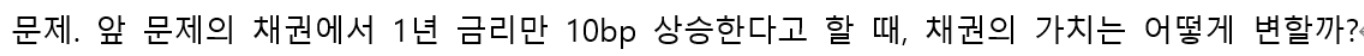

In [29]:
P1,df1=bnd_pricer(0.03,5,2,5,10,'df')
print(df1)

   Time  CashFlow        DF    Disc_CF
0   0.5       2.5  0.985112   2.462780
1   1.0       2.5  0.970446   2.426114
2   1.5       2.5  0.955997   2.389994
3   2.0       2.5  0.941765   2.354411
4   2.5       2.5  0.927743   2.319359
5   3.0       2.5  0.913931   2.284828
6   3.5       2.5  0.900325   2.250811
7   4.0       2.5  0.886920   2.217301
8   4.5       2.5  0.873716   2.184290
9   5.0     102.5  0.860708  88.222568


In [30]:
DF1 = np.exp(-0.031*1)
df1.DF.iloc[1] = DF1  # 1년 DF 수정
df1.Disc_CF = df1.CashFlow*df1.DF  # 1년 Disc_DF수정
col_sum = df1.sum(axis=0)
P2 = col_sum.iloc[-1]  # 마지막 칼럼 합
print(df1.iloc[:3])  # 3행까지만 출력
print('원래의 채권 가격:', P1)
print('1년 테너 10bp 상승 후 채권가격:', P2)

   Time  CashFlow        DF   Disc_CF
0   0.5       2.5  0.985112  2.462780
1   1.0       2.5  0.969476  2.423689
2   1.5       2.5  0.955997  2.389994
원래의 채권 가격: 109.11245516146882
1년 테너 10bp 상승 후 채권가격: 109.1100302602876


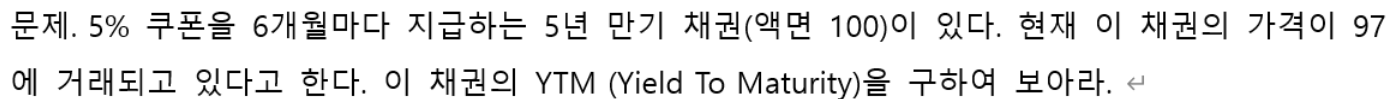

In [31]:
import sympy as sp

r=sp.symbols('r',positive=True)
eq=100-10/(1+r)-110/(1+r)**2
sp.solve(eq,r)

[1/10]

In [33]:
import numpy_financial as npf

# 현금 흐름(flows)을 정의합니다.
cash_flows = [-100, 10, 110]

# 내부수익률(Irr)을 계산합니다.
irr = npf.irr(cash_flows)

print("내부수익률은 {:.2f}% 입니다.".format(irr * 100))

내부수익률은 10.00% 입니다.


In [36]:
def bnd_irr_bisection(target_price, T, freq, years_to_maturity, face_value, tolerance=1e-6, max_iter=10000):
    # 초기 구간 설정
    lower_bound,upper_bound = 0.01,0.2

    # 이분법 알고리즘 수행
    iteration = 0
    while iteration < max_iter:
        mid_point = (lower_bound + upper_bound) / 2
        price_at_mid_point = bnd_pricer(mid_point, T, freq, years_to_maturity, face_value)
        diff = price_at_mid_point - target_price # 타겟 가격과의 차이 확인

        # 수렴성 검사
        if abs(diff) < tolerance:
            return mid_point

        # 이분법 적용
        if diff < 0:
            upper_bound = mid_point
        else:
            lower_bound = mid_point

        iteration += 1

    # 수렴하지 않는 경우 None 반환
    return None

In [37]:
# 이분법 알고리즘으로 IRR 계산
ytm=bnd_irr_bisection(97, 5, 2, 5, 100)
# 알고리즘으로 찾은 ytm으로 채권가격 계산
bndp=bnd_pricer(ytm,5,2,5,100)
print('채권 YTM:', ytm)
print("YTM이 {0:.3f}%일 때, 채권 가격은 {1:.3f} 입니다".format(ytm*100,bndp))

채권 YTM: 0.056183151155710216
YTM이 5.618%일 때, 채권 가격은 97.000 입니다


In [34]:
P1,df1=bnd_pricer(0.03,5,2,5,10,'df')
print(df1)

   Time  CashFlow        DF    Disc_CF
0   0.5       2.5  0.985112   2.462780
1   1.0       2.5  0.970446   2.426114
2   1.5       2.5  0.955997   2.389994
3   2.0       2.5  0.941765   2.354411
4   2.5       2.5  0.927743   2.319359
5   3.0       2.5  0.913931   2.284828
6   3.5       2.5  0.900325   2.250811
7   4.0       2.5  0.886920   2.217301
8   4.5       2.5  0.873716   2.184290
9   5.0     102.5  0.860708  88.222568


In [35]:
def bnd_irr(price,coupon,freq,maturity,face_value):
    import sympy as sp
    r=sp.symbols('r',positive=True)

    # freq: 연 쿠폰 지급회수
    period=1/freq
    T=np.arange(period,maturity+0.1,period)

    CF=np.array([coupons/freq]*len(T))
    CF[-1]+=Face_value # 마지막에 명목금액 더해줌
    # 맨 앞에 -price을 추가합니다.
    CF = np.insert(CF, 0, -price)
    # 계수를 내림차순으로 정렬합니다.
    CF = np.sort(CF)[::-1]
    # 다항식을 생성합니다.

    polynomial = sp.Poly(CF, 1/(1+r/2))
    eq=polynomial
    sol=sp.solve(eq,r)
    return sol,polynomial

sol,p=bnd_irr(97,5,2,5,100)
p

Poly(102.5*(1/(r/2 + 1))**10 + 2.5*(1/(r/2 + 1))**9 + 2.5*(1/(r/2 + 1))**8 + 2.5*(1/(r/2 + 1))**7 + 2.5*(1/(r/2 + 1))**6 + 2.5*(1/(r/2 + 1))**5 + 2.5*(1/(r/2 + 1))**4 + 2.5*(1/(r/2 + 1))**3 + 2.5*(1/(r/2 + 1))**2 + 2.5*(1/(r/2 + 1)) - 97.0, 1/(r/2 + 1), domain='RR')